# Plotter Notebook
This notebook seamlessly plots data gathered from training runs done on the GPU.

In [1]:
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

### File Parsing Function

In [3]:
def readfiles(files):
    params = [filename.replace("data/\\", "").replace("data/", "").replace("_train_costs.csv", "").replace("_val_costs.csv", "").replace('/', '_').replace('\\', '_').split('_') for filename in files]
    filedumps = [np.genfromtxt(filename, delimiter=',') for filename in files]
    return filedumps, params

## Plots During Testing

### Plot Specific Data

In [11]:
# Train Costs
TRAIN_FILES = ["../experiments/num_train_val_pairs/a-1.0_DisCoCat_1000-200-pairs_train_costs.csv"]
VAL_FILES = ["data/120-EPOCHS/a-1.0_DisCoCat_val_costs.csv", "data/120-EPOCHS/a-1.0_DisCoCat_val_costs_0.1-0.9.csv"]
# Val Costs
train_costs, train_params = readfiles(TRAIN_FILES)
val_costs, val_params = readfiles(VAL_FILES)
# Plot
colours = ['darkred', 'darkblue', 'darkgreen']
for i, (train_cost, labels) in enumerate(zip(train_costs, train_params)):
    plt.plot(train_cost, color=colours[i] , label=f"Train Costs: {labels}")

for i, (val_cost, labels) in enumerate(zip(val_costs, val_params)):
    plt.plot(val_cost, linestyle="--", color=colours[i], label=f"Val Costs: {labels}")

plt.xlabel("Epoch")
plt.ylabel("MAE Cost")
plt.title(f"Comparison of Model Convergences")
plt.legend()
plt.grid()
plt.show()

FileNotFoundError: ../experiments/num_train_val_pairs/a-1.0_DisCoCat_1000-200-pairs_train_costs.csv not found.

### Plot All Data (120 Epochs)

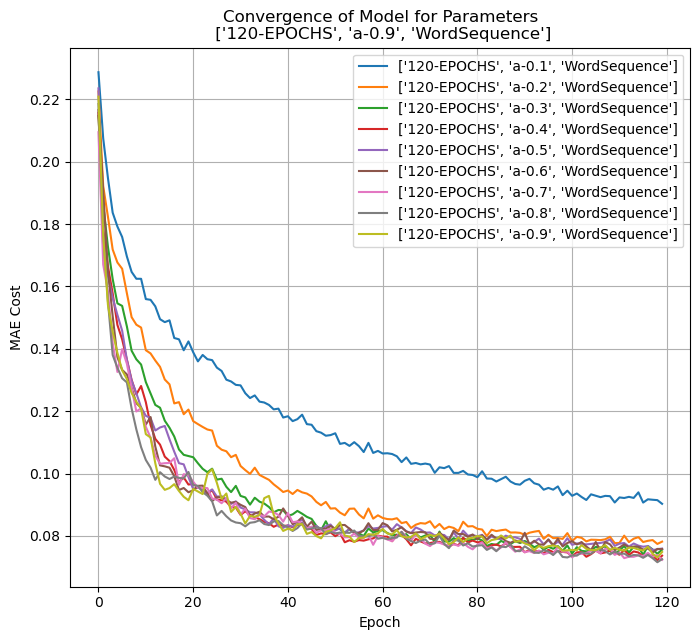

In [21]:
# Train Costs
train_files = glob.glob("data/120-EPOCHS/*WordSequence_train_costs.csv")
train_costs, train_params = readfiles(train_files)
# Val Costs
val_files = glob.glob("data/120-EPOCHS/*val_costs.csv")
val_costs, val_params = readfiles(val_files)
# Plot
fig, ax = plt.subplots(1)
for train_cost, val_cost, labels in zip(train_costs, val_costs, train_params,):
    ax.plot(train_cost, label=f"{labels}")
    # ax.plot(val_cost, linestyle="--", label=f"{labels}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MAE Cost")
    ax.set_title(f"Convergence of Model for Parameters\n {labels}")
    plt.grid()
    plt.legend()
    plt.rcParams["figure.figsize"] = (8, 7)
plt.show()